In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!ls /content/gdrive/MyDrive/OIDv6/obj

'piring (1).jpg'   train       'vegs (1).h5'  'vegs (3).h5'   vegs.h5
 piring.jpg	   validation  'vegs (2).h5'  'vegs (4).h5'


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image  import ImageDataGenerator, img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob

train_path = "/content/gdrive/MyDrive/OIDv6/obj/train"
validation_path = "/content/gdrive/MyDrive/OIDv6/obj/validation"

In [14]:
classes = glob(train_path + "/*")
number_of_class = len(classes)
print("Number of class : " , number_of_class)

Number of class :  5


In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = (150,150),
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(validation_path,
                                                   target_size = (150,150),
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')

Found 7490 images belonging to 5 classes.
Found 7271 images belonging to 5 classes.


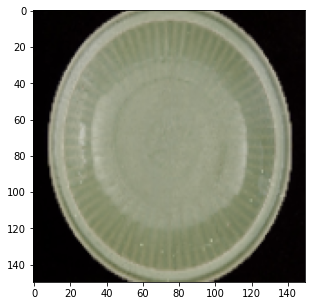

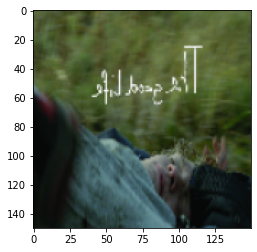

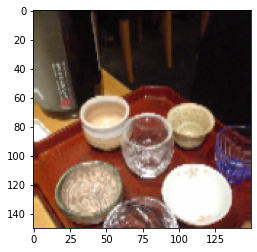

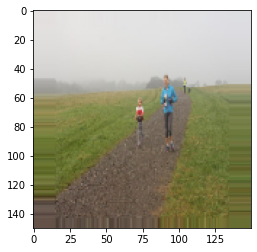

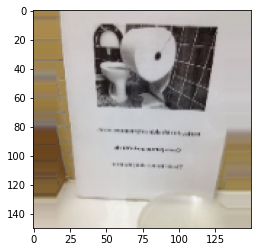

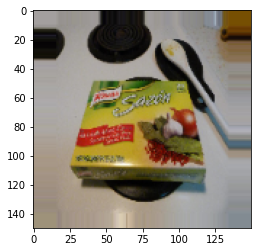

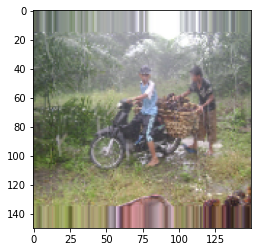

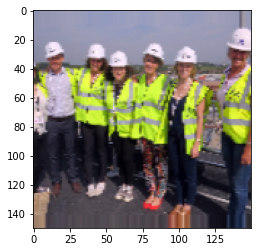

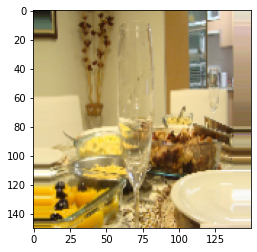

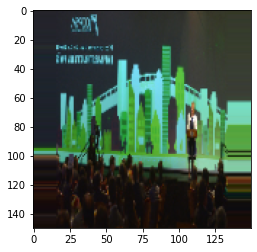

In [24]:
x,y = train_generator.next()
fig = plt.figure(figsize =(30,5))
for i in range(10):
 image = x[i]
 plt.imshow(image)
 plt.show()

In [36]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 188s 9s/step - loss: 2.3568 - accuracy: 0.4531 - val_loss: 0.3189 - val_accuracy: 1.0000
Epoch 2/25
20/20 [==============================] - 178s 9s/step - loss: 1.3701 - accuracy: 0.5422 - val_loss: 1.2555 - val_accuracy: 0.9896
Epoch 3/25
20/20 [==============================] - 163s 8s/step - loss: 1.2552 - accuracy: 0.5688 - val_loss: 0.2927 - val_accuracy: 1.0000
Epoch 4/25
20/20 [==============================] - 151s 8s/step - loss: 1.3009 - accuracy: 0.5391 - val_loss: 0.3794 - val_accuracy: 0.9583
Epoch 5/25
20/20 [==============================] - 138s 7s/step - loss: 1.2246 - accuracy: 0.5703 - val_loss: 0.5761 - val_accuracy: 1.0000
Epoch 6/25
20/20 [==============================] - 148s 7s/step - loss: 1.2141 - accuracy: 0.5500 - val_loss: 0.4238 - val_accuracy: 0.9896
Epoch 7/25
20/20 [==============================] - 145s 7s/step - loss: 1.2094 - accuracy: 0.5328 - val_loss: 0.6785 - val_accuracy: 0.9792
Epoch 8/25
20

<Figure size 432x288 with 0 Axes>

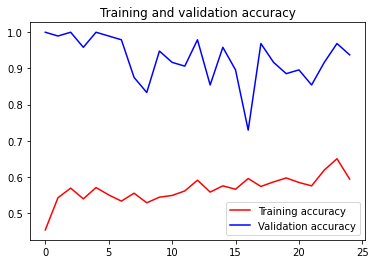

<Figure size 432x288 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [50]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)


Epoch 1/25
20/20 [==============================] - 151s 8s/step - loss: 1.6861 - accuracy: 0.4797 - val_loss: 0.8999 - val_accuracy: 1.0000
Epoch 2/25
20/20 [==============================] - 92s 5s/step - loss: 1.2417 - accuracy: 0.5422 - val_loss: 0.2661 - val_accuracy: 0.9896
Epoch 3/25
20/20 [==============================] - 100s 5s/step - loss: 1.3434 - accuracy: 0.5297 - val_loss: 0.5307 - val_accuracy: 1.0000
Epoch 4/25
20/20 [==============================] - 108s 5s/step - loss: 1.1602 - accuracy: 0.5375 - val_loss: 1.9254 - val_accuracy: 0.0000e+00
Epoch 5/25
20/20 [==============================] - 97s 5s/step - loss: 1.4609 - accuracy: 0.5082 - val_loss: 0.3737 - val_accuracy: 0.9896
Epoch 6/25
20/20 [==============================] - 94s 5s/step - loss: 1.1840 - accuracy: 0.5422 - val_loss: 0.3989 - val_accuracy: 0.9167
Epoch 7/25
20/20 [==============================] - 84s 4s/step - loss: 1.2284 - accuracy: 0.5049 - val_loss: 0.2986 - val_accuracy: 0.9896
Epoch 8/25
20

In [51]:
loss = model.evaluate(validation_generator, steps=10)

10/10 [==============================] - 54s 6s/step - loss: 0.3007 - accuracy: 0.9375


<Figure size 432x288 with 0 Axes>

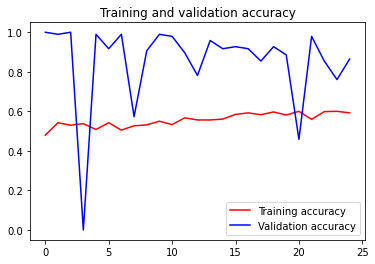

<Figure size 432x288 with 0 Axes>

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [56]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving piring.jpg to piring.jpg
piring.jpg
[[1. 0. 0. 0. 0.]]


In [70]:
model.save_weights('/content/blind_app.h5')

In [73]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      